# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

In [1]:
### Installing API & libraries
!pip install nba_api unidecode matplotlib seaborn geopandas

### Importing Drive to export/import csv files
from google.colab import drive
drive.mount('/content/drive')

### Importing NBA API endpoints
from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playerprofilev2

### Importing libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from datetime import date
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm
import geopandas as gpd

### List of possibles proxy servers
ps = ['63.161.104.189:3128', '213.136.101.36:3128', '5.39.189.39:3128']

     |████████████████████████████████| 125 kB 7.6 MB/s 
     |████████████████████████████████| 235 kB 48.9 MB/s 
     |████████████████████████████████| 1.0 MB 49.5 MB/s 
     |████████████████████████████████| 16.7 MB 289 kB/s 
     |████████████████████████████████| 6.3 MB 34.3 MB/s 
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=745e0a23644eb924190a203a001bf92279e97f3ca66a70e4058d9740bea5fc7f
  Stored in directory: /root/.cache/pip/wheels/e3/f4/46/996128675381abc175e306642bae575d372dcf7efc4683e551
Successfully built nba-api
Mounted at /content/drive


1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [ ]:
### Complete in this cell: get all active players from the api

### The get_and_save_players_list function make the first request to the NBA API.
### In the commonallplayers endpoint, the argument is_only_current_season=1 sets to True the request for active players.
### The [0] indexing at the end of the request is to extract the DataFrame we are looking for as it's return as the first element of a list.
### First try without proxy server / Second try with a proxy server (see the list of possible proxy server in the previous cell)
### Slice with 3 boolean masks in order to drop (TEAM_IDs = 0, GAMES_PLAYED_FLAG = N and ID = 1630597)
### The return expresion is sliced to obtain the IDs, the names and team names.

def get_and_save_players_list():
    try:
      request_current_players_list = commonallplayers.CommonAllPlayers(is_only_current_season=1, timeout=60).get_data_frames()[0] # API-endpoint request gives list[0]=DataFrame
      request_current_players_list = request_current_players_list[(request_current_players_list["TEAM_ID"] != 0) & (request_current_players_list["GAMES_PLAYED_FLAG"] != "N") & (request_current_players_list["PERSON_ID"] != 1630597)]
    except:
      print("Request problem. Switching to a proxy server...")
      request_current_players_list = commonallplayers.CommonAllPlayers(is_only_current_season=1, proxy=ps[0], timeout=60).get_data_frames()[0] # Same request through proxy
      request_current_players_list = request_current_players_list[(request_current_players_list["TEAM_ID"] != 0) & (request_current_players_list["GAMES_PLAYED_FLAG"] != "N") & (request_current_players_list["PERSON_ID"] != 1630597)]
    finally:
      return request_current_players_list[["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_NAME"]]

In [ ]:
### Calling the function and exporting to csv
current_players_list = get_and_save_players_list()
current_players_list.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_current_players_list.csv", index=False)

In [ ]:
### Calling the same previous object reading from csv
current_players_list = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_current_players_list.csv")
current_players_list.set_index("PERSON_ID", inplace=True)
current_players_list

,DISPLAY_FIRST_LAST,TEAM_NAME
PERSON_ID,,
1630173,Precious Achiuwa,Raptors
203500,Steven Adams,Grizzlies
1628389,Bam Adebayo,Heat
1630583,Santi Aldama,Grizzlies
200746,LaMarcus Aldridge,Nets
...,...,...
1628221,Gabe York,Pacers
201152,Thaddeus Young,Raptors
1629027,Trae Young,Hawks


2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [ ]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

### The get_players_personal_information function requests personal information about each player ID with a for loop.
### In the commonplayerinfo endpoint, the main argument is the player ID.
### The [0] indexing at the end of the request is to extract the DataFrame we are looking for as it's return as the first element of a list.
### First try without proxy server / Second try with a proxy server (see the list of possible proxy server in the previous cell)
### Initializing with an empty DataFrame, the for loop concatenate every response of the API as a new row corresponding to one player ID.
### The return expresion is sliced to obtain the personal information we are looking for.

def get_players_personal_information(current_players_list):
  request_players_personal_info = pd.DataFrame()
  try:
    for id in tqdm(current_players_list.index, desc="First request..."):
      data = commonplayerinfo.CommonPlayerInfo(player_id = id, timeout=60).get_data_frames()[0]
      request_players_personal_info = pd.concat([request_players_personal_info, data])
      time.sleep(0.5)
  except:
    print("Request problem. Switching to a proxy server...")
    for id in tqdm(current_players_list.index, desc="Second request (proxy)..."):
      data = commonplayerinfo.CommonPlayerInfo(player_id = id, proxy=ps[0], timeout=60).get_data_frames()[0]
      request_players_personal_info = pd.concat([request_players_personal_info, data])
      time.sleep(0.5)
  finally:
    return request_players_personal_info[["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]

In [ ]:
### Calling the function and exporting to csv
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_personal_info.csv", index=False)

In [ ]:
### Calling the same previous object reading from csv
players_personal_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_personal_info.csv")
players_personal_info.set_index("PERSON_ID", inplace=True)
players_personal_info

,DISPLAY_FIRST_LAST,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER
PERSON_ID,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2
...,...,...,...,...,...,...,...,...,...
1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,0,Undrafted
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [ ]:
### Complete in this cell: find players career stats, save to csv file

### The get_players_career_stats function requests statistics about each player ID with a for loop.
### In the playercareerstats endpoint, the main argument is the player ID but also per_mode36 set as "PerGame" to obtain average statistics per game.
### First try without proxy server / Second try with a proxy server (see the list of possible proxy server in the previous cell)
### Initializing with an empty DataFrame, the for loop concatenate every response of the API as a new row corresponding to one player ID.
### The return expresion is sliced to obtain the statistics we are looking for.

def get_players_career_stats(current_players_list):
  request_players_career_stats = pd.DataFrame()
  try:
    for id in tqdm(current_players_list.index, desc="First request..."):
      data = playercareerstats.PlayerCareerStats(player_id = id, per_mode36="PerGame", timeout=60).career_totals_regular_season.get_data_frame()
      request_players_career_stats = pd.concat([request_players_career_stats, data])      
      time.sleep(0.5)
  except:
    print("Request problem. Switching to a proxy server...")
    for id in tqdm(current_players_list.index, desc="Second request (proxy)..."):
      data = playercareerstats.PlayerCareerStats(player_id = id, per_mode36="PerGame", proxy=ps[0], timeout=60).career_totals_regular_season.get_data_frame()
      request_players_career_stats = pd.concat([request_players_career_stats, data])      
      time.sleep(0.5)
  finally:
    return request_players_career_stats[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]

In [ ]:
### Calling the function and exporting to csv
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_career_stats.csv", index=False)

In [ ]:
### Calling the same previous object reading from csv
players_career_stats = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_career_stats.csv")
players_career_stats.set_index("PLAYER_ID", inplace=True)
players_career_stats

,GP,MIN,PTS,REB,AST,STL,BLK
PLAYER_ID,,,,,,,
1630173,134,18.4,7.2,5.1,0.8,0.4,0.5
203500,664,26.8,9.3,8.0,1.5,0.9,0.9
1628389,343,28.2,13.5,8.3,3.5,1.0,0.9
1630583,32,11.2,4.1,2.7,0.7,0.2,0.3
200746,1076,33.7,19.1,8.1,1.9,0.7,1.1
...,...,...,...,...,...,...,...
1628221,2,10.7,4.0,1.0,2.0,1.0,0.5
201152,1085,29.3,12.8,5.8,1.8,1.4,0.4
1629027,280,33.6,25.3,3.9,9.1,0.9,0.2


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [ ]:
### Complete in this cell: find players next game

### The get_players_next_game function requests next game information about each player ID with a for loop.
### In the playerprofilev2 endpoint, the main argument is the player ID.
### First try without proxy server / Second try with a proxy server (see the list of possible proxy server in the previous cell)
### Initializing with an empty DataFrame, the for loop concatenate every response of the API as a new row corresponding to one player ID after adding an ID column.
### The return expresion is sliced to obtain the next game information we are looking for.

def get_players_next_game(current_players_list):
  request_players_next_game = pd.DataFrame()
  try:
    for id in tqdm(current_players_list.index, desc="First request..."):
      data = playerprofilev2.PlayerProfileV2(player_id = id, timeout=60).next_game.get_data_frame()
      data["PLAYER_ID"] = id
      request_players_next_game = pd.concat([request_players_next_game, data])      
      time.sleep(0.5)
  except:
    print("Request problem. Switching to a proxy server...")
    for id in tqdm(current_players_list.index, desc="Second request (proxy)..."):
      data = playerprofilev2.PlayerProfileV2(player_id = id, proxy=ps[0], timeout=60).next_game.get_data_frame()
      data["PLAYER_ID"] = id
      request_players_next_game = pd.concat([request_players_next_game, data])      
      time.sleep(0.5)
  finally:
    return request_players_next_game[["PLAYER_ID", "GAME_DATE"]]

In [ ]:
### Calling the function and exporting to csv
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_next_game.csv", index=False)

First request...:   0%|          | 0/503 [00:00<?, ?it/s]

Request problem. Switching to a proxy server...


Second request (proxy)...:   0%|          | 0/503 [00:00<?, ?it/s]

KeyError: ignored

In [ ]:
### Calling the same previous object reading from csv
players_next_game = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_next_game.csv")
players_next_game.set_index("PLAYER_ID", inplace=True)
players_next_game

,GAME_DATE
PLAYER_ID,
1630173,APR 20 2022
203500,APR 19 2022
1628389,APR 19 2022
1630583,APR 19 2022
200746,APR 20 2022
...,...
1630589,APR 21 2022
1630593,APR 19 2022
201152,APR 20 2022


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [ ]:
### Complete in this cell: find players salary, save the information to csv

### 

def get_nba_players_salaries():    
    players_salaries = pd.read_html("https://www.basketball-reference.com/contracts/players.html", index_col=0)[0].droplevel(0, axis=1)
    players_salaries = players_salaries[(players_salaries.index.notna()) & (players_salaries.index != "Rk")].drop_duplicates(subset=['Player'])
    players_salaries["Player"] = players_salaries["Player"].apply(lambda x: unidecode(x))

    return players_salaries[["Player", "2021-22"]]

In [ ]:
### Calling the function and exporting to csv
players_salaries = get_nba_players_salaries()
players_salaries.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_salary.csv", index_label="Ranking")

In [ ]:
### Calling the same previous object reading from csv
players_salaries = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_salary.csv", index_col=0)
players_salaries

,Player,2021-22
Ranking,,
1,Stephen Curry,"$45,780,966"
2,John Wall,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,James Harden,"$43,848,000"
5,LeBron James,"$41,180,544"
...,...,...
608,Skylar Mays,"$34,231"
611,Terry Taylor,"$21,270"
612,Duane Washington Jr.,"$21,270"


6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [ ]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    merge1 = players_personal_info.merge(players_career_stats, left_index=True, right_index=True)
    merge2 = merge1.merge(players_next_game, left_index=True, right_index=True, how="left")
    merge3 = merge2.merge(players_salaries, left_on="DISPLAY_FIRST_LAST", right_on="Player", how="left")
    id_indexing = current_players_list.reset_index()[["PERSON_ID", "DISPLAY_FIRST_LAST"]]
    out_merge = id_indexing.merge(merge3, on="DISPLAY_FIRST_LAST", how="right")
    out_merge.drop("Player", 1, inplace=True)
    out_merge.rename(columns={'PERSON_ID':'PLAYER_ID', 'DISPLAY_FIRST_LAST':'PLAYER_NAME', '2021-22':'SALARY'}, inplace=True)
    return out_merge, merge1, merge2, merge3

In [ ]:
### Calling the function and exporting to csv
raw_players_dataset, merge1, merge2, merge3 = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/raw_nba_players_dataset.csv", index=False)

In [ ]:
### Calling the same previous object reading from csv
raw_players_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/raw_nba_players_dataset.csv")
raw_players_dataset.set_index("PLAYER_ID", inplace=True)
raw_players_dataset

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 20 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 19 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 19 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 19 2022,"$1,994,520"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 20 2022,"$2,641,691"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,0,Undrafted,2,10.7,4.0,1.0,2.0,1.0,0.5,NaN,NaN
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,APR 20 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,APR 19 2022,"$8,326,471"


## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [ ]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary

### Using notna() with a double boolean mask to remove NaN from both columns
def copy_and_delete_nan(players_dataset):
    players_dataset = players_dataset[(players_dataset["TEAM_NAME"].notna()) & (players_dataset["SALARY"].notna())]
    return players_dataset

In [ ]:
### Calling the function and overwriting
working_df = copy_and_delete_nan(raw_players_dataset)
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 20 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 19 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 19 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 19 2022,"$1,994,520"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 20 2022,"$2,641,691"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26T00:00:00,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,APR 19 2022,"$8,526,316"
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,APR 20 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,APR 19 2022,"$8,326,471"


2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [ ]:
### Complete in this cell: cast all columns to its type

### First deleting "$" and "," characters, setting the remaining as float and turning the birthdate and game_date columns to datetime format
def cast_columns(working_df):
    working_df_cast = working_df
    working_df_cast["SALARY"].replace({"\$":"",",":""}, regex=True, inplace=True)
    working_df_cast["SALARY"].astype(float)
    working_df_cast["BIRTHDATE"] = pd.to_datetime(working_df_cast["BIRTHDATE"])
    working_df_cast["GAME_DATE"] = pd.to_datetime(working_df_cast["GAME_DATE"])
    return working_df_cast

In [ ]:
### Calling the function and overwriting
working_df = cast_columns(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-20,2711280
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-19,8526316
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-20,14190000
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-19,8326471


3- Create a function that converts the height column from height in feet and inches to centimeters

In [ ]:
### Complete in this cell: convert height column

### Using lambda function to convert feet and inches to cm before adding them on the same column
def convert_height_column(working_df):
  # 1 feet = 30,48 cm // 1 inches = 2,54 cm
  working_df["HEIGHT"] = working_df["HEIGHT"].apply(lambda x: int(round(int(x[0])*30.48 + int(x[2:])*2.54,0)))
  return working_df

In [ ]:
### Calling the function and overwriting
working_df = convert_height_column(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-20,2711280
203500,Steven Adams,Grizzlies,Center,211,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,211,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,211,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-19,8526316
201152,Thaddeus Young,Raptors,Forward,203,235,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-20,14190000
1629027,Trae Young,Hawks,Guard,185,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-19,8326471


4- Create a function that converts the weight column from pounds to kilograms

In [ ]:
### Complete in this cell: convert weight column

### Using lambda function to pounds to kilograms
def convert_weight_column(working_df):
    # 1 pound = 0,45 kg
    working_df["WEIGHT"] = working_df["WEIGHT"].apply(lambda x: round(x*0.45,0))
    return working_df

In [ ]:
### Calling the function and overwriting
working_df = convert_weight_column(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PLAYER_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-20,2711280
203500,Steven Adams,Grizzlies,Center,211,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,211,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,211,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-19,8526316
201152,Thaddeus Young,Raptors,Forward,203,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-20,14190000
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-19,8326471


5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [ ]:
### Complete in this cell: add age column

### Using lambda function to first apply relativedelta date substraction, before using years/months/days method to set them up in a string
def add_age_column(working_df):
  working_df["AGE"] = working_df["BIRTHDATE"].apply(lambda x: str(relativedelta(date.today(), x.date()).years)+" years, "+str(relativedelta(date.today(), x.date()).months)+" months, "+str(relativedelta(date.today(), x.date()).days)+" days")
  return working_df

In [ ]:
### Calling the function and overwriting
working_df = add_age_column(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-20,2711280,"22 years, 7 months, 7 days"
203500,Steven Adams,Grizzlies,Center,211,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171,"28 years, 9 months, 6 days"
1628389,Bam Adebayo,Heat,Center-Forward,206,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550,"24 years, 9 months, 8 days"
1630583,Santi Aldama,Grizzlies,Forward-Center,211,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520,"21 years, 3 months, 16 days"
200746,LaMarcus Aldridge,Nets,Center-Forward,211,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691,"36 years, 9 months, 7 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-19,8526316,"30 years, 0 months, 0 days"
201152,Thaddeus Young,Raptors,Forward,203,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-20,14190000,"33 years, 10 months, 5 days"
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-19,8326471,"23 years, 7 months, 7 days"


6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [ ]:
### Complete in this cell: disambiguation of the position column

### Spliting values for multiposition player to keep only the first value
def update_position(working_df):
    position = working_df["POSITION"].str.split("-", expand=True)
    working_df["POSITION"] = position[0]
    return working_df

In [ ]:
### Calling the function and overwriting
working_df = update_position(working_df)
working_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-20,2711280,"22 years, 7 months, 7 days"
203500,Steven Adams,Grizzlies,Center,211,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171,"28 years, 9 months, 6 days"
1628389,Bam Adebayo,Heat,Center,206,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550,"24 years, 9 months, 8 days"
1630583,Santi Aldama,Grizzlies,Forward,211,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520,"21 years, 3 months, 16 days"
200746,LaMarcus Aldridge,Nets,Center,211,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691,"36 years, 9 months, 7 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-19,8526316,"30 years, 0 months, 0 days"
201152,Thaddeus Young,Raptors,Forward,203,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-20,14190000,"33 years, 10 months, 5 days"
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-19,8326471,"23 years, 7 months, 7 days"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [ ]:
### Exporting to csv
working_df.to_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

In [ ]:
### Calling the same previous object reading from csv
working_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AnyoneAI - Sprint 1/Project/nba_players_processed_dataset.csv")
working_df.set_index("PLAYER_ID", inplace=True)
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PLAYER_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,101.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-20,2711280,"22 years, 7 months, 7 days"
203500,Steven Adams,Grizzlies,Center,211,119.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-19,17073171,"28 years, 9 months, 6 days"
1628389,Bam Adebayo,Heat,Center,206,115.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-19,28103550,"24 years, 9 months, 8 days"
1630583,Santi Aldama,Grizzlies,Forward,211,97.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-19,1994520,"21 years, 3 months, 16 days"
200746,LaMarcus Aldridge,Nets,Center,211,112.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-20,2641691,"36 years, 9 months, 7 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,83.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-19,8526316,"30 years, 0 months, 0 days"
201152,Thaddeus Young,Raptors,Forward,203,106.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-20,14190000,"33 years, 10 months, 5 days"
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-19,8326471,"23 years, 7 months, 7 days"


Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [ ]:
### Complete in this cell: print general metrics

  # Total number of players
print("There are " + str(len(working_df.index.unique())) + " players in total.")

  # Number of USA born players
print(str(len(working_df[working_df["COUNTRY"] == "USA"])) + " of them are USA born players,")

  # Number of foreign players
print("and the other " + str(len(working_df[working_df["COUNTRY"] != "USA"])) + " are foreign players.")

  # Number of players per position
print("Number of players per position: \n " + str(working_df.groupby("POSITION")["POSITION"].count()))

  # Number of players per team
print("Number of players per team: \n " + str(working_df.groupby("TEAM_NAME")["TEAM_NAME"].count()))

  # Number of rookies (first year players)
print("There are " + str(len(working_df[working_df["SEASON_EXP"] == 0])) + " rookies.")

There are 446 players in total.
338 of them are USA born players,
and the other 108 are foreign players.
Number of players per position: 
 POSITION
Center      59
Forward    175
Guard      212
Name: POSITION, dtype: int64
Number of players per team: 
 TEAM_NAME
76ers            15
Bucks            14
Bulls            16
Cavaliers        16
Celtics          14
Clippers         13
Grizzlies        15
Hawks            14
Heat             15
Hornets          15
Jazz             15
Kings            15
Knicks           14
Lakers           15
Magic            15
Mavericks        15
Nets             15
Nuggets          14
Pacers           15
Pelicans         16
Pistons          14
Raptors          15
Rockets          15
Spurs            16
Suns             15
Thunder          15
Timberwolves     15
Trail Blazers    15
Warriors         15
Wizards          15
Name: TEAM_NAME, dtype: int64
There are 60 rookies.


In [ ]:
### Complete in this cell: print players descriptions

  # - Average player age (in years)
print(f'The average player age is {int(working_df["AGE"].str[:2].astype(int).mean())} years')
  # print("The average player age is "+ str(round(working_df["BIRTHDATE"].apply(lambda x: relativedelta(date.today(), x.date()).years).mean())) + " years")

  # - Youngest player age (years and days, i.e: 18 years and 16 days)
print(f"The youngest player is {working_df['AGE'].min().split(',')[0]} and {str(int(int(working_df['AGE'].min().split(',')[1][0:3])*30.41 + int((working_df['AGE'].min().split(',')[2][0:3]))))} days old")

  # Oldest player age (years and days, i.e: 40 years and 160 days)
print(f"The oldest player is {working_df['AGE'].max().split(',')[0]} and {str(int(int(working_df['AGE'].max().split(',')[1][0:3])*30.41 + int((working_df['AGE'].max().split(',')[2][0:3]))))} days old")

  # Min and Max players height
print(f"The smallest player is {working_df['HEIGHT'].min()} cm")
print(f"The tallest player is {working_df['HEIGHT'].max()} cm")

  # Average height of players per position
print("Averga height of players per position in cm: \n" + str(working_df.groupby("POSITION")["HEIGHT"].mean()))

The average player age is 26 years
The youngest player is 19 years and 330 days old
The oldest player is 41 years and 321 days old
The smallest player is 175 cm
The tallest player is 221 cm
Averga height of players per position in cm: 
POSITION
Center     210.813559
Forward    203.051429
Guard      192.438679
Name: HEIGHT, dtype: float64


In [ ]:
### Complete in this cell: Contracts

  # Min and Max salary of all players
print("The minimum salary is " + str(working_df["SALARY"].min()) + " USD")
print("The maximum salary is " + str(working_df["SALARY"].max()) + " USD")

  # Mean and Median salary of all players
print("The average salary is " + str(working_df["SALARY"].mean()))
print("The median of salaries is " + str(working_df["SALARY"].median()))

The minimum salary is 5318 USD
The maximum salary is 45780966 USD
The average salary is 8728325.706278026
The median of salaries is 4405080.0


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

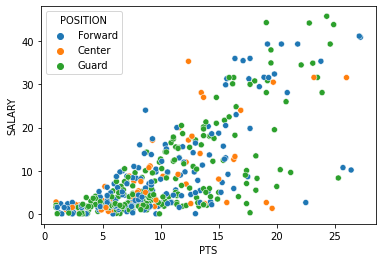

In [ ]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
sns.scatterplot(data=working_df, x="PTS", y=working_df["SALARY"]/1000000, hue="POSITION")

3- Now plot assists-vs-salary and rebounding-vs-salary

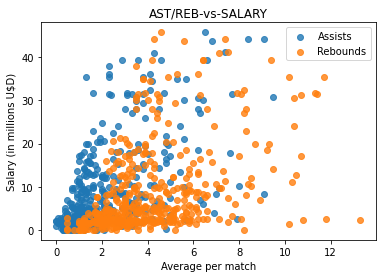

In [ ]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
def astreb_salary(file):
  fig = plt.figure()
  axes = fig.add_subplot(111)

  axes.scatter(file["AST"], y=file["SALARY"]/1000000, label="Assists", alpha=0.8)
  axes.scatter(file["REB"], y=file["SALARY"]/1000000, label="Rebounds", alpha=0.8)

  plt.legend(["Assists", "Rebounds"])
  plt.xlabel("Average per match")
  plt.ylabel("Salary (in millions U$D)")
  axes.set_title("AST/REB-vs-SALARY")

astreb_salary(working_df)

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

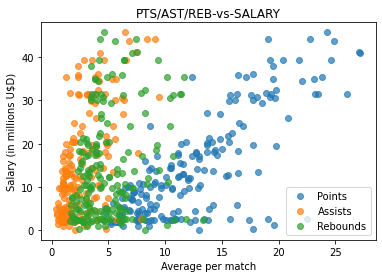

In [ ]:
### Complete in this cell: non rookie contracts
working_df_norookies = working_df[working_df["SEASON_EXP"] > 4]

def ptsastreb_salary(file):
  fig = plt.figure()
  axes = fig.add_subplot(111)

  axes.scatter(file["PTS"], y=file["SALARY"]/1000000, label="Points", alpha=0.7)
  axes.scatter(file["AST"], y=file["SALARY"]/1000000, label="Assists", alpha=0.7)
  axes.scatter(file["REB"], y=file["SALARY"]/1000000, label="Rebounds", alpha=0.7)

  plt.legend(["Points", "Assists", "Rebounds"], loc= "lower right")
  plt.xlabel("Average per match")
  plt.ylabel("Salary (in millions U$D)")
  axes.set_title("PTS/AST/REB-vs-SALARY")

ptsastreb_salary(working_df_norookies)

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

Median of average scoring by position: 
POSITION
Center     8.40
Forward    8.50
Guard      9.65
Name: PTS, dtype: float64


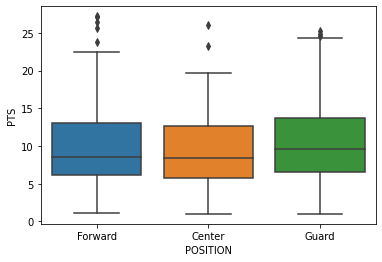

In [ ]:
### Complete in this cell: Scoring average grouped by position
data = working_df.groupby("POSITION")["PTS"].median()
print(f"Median of average scoring by position: \n{data}")
sns.boxplot(x=working_df["POSITION"], y=working_df["PTS"])

6- Plot the Height distribution of all players

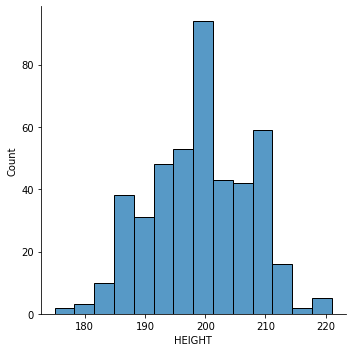

In [ ]:
### Complete in this cell: height distribution
sns.displot(working_df, x="HEIGHT", kind="hist")

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

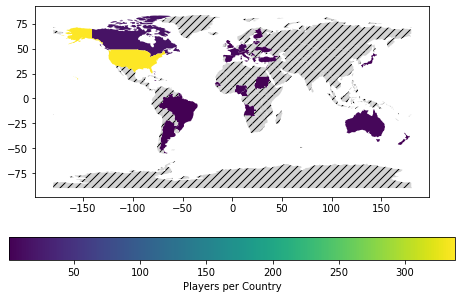

In [ ]:
### Processing the data to draw the map
working_df_map = working_df[["PLAYER_NAME","COUNTRY"]]
working_df_map["PLAYER_NAME"] = working_df_map["PLAYER_NAME"].astype(str)
working_df_map["COUNTRY"] = working_df_map["COUNTRY"].astype(str)
working_df_map["COUNTRY"] = working_df_map["COUNTRY"].apply(lambda x: x.replace('USA','United States of America') if x=='USA' else x)
working_df_map_grouped = working_df_map.groupby("COUNTRY").count()
working_df_map_grouped.reset_index(inplace=True)
working_df_map_grouped.rename(columns={"PLAYER_NAME":"PLAYER_COUNT"}, inplace=True)

### Merging the DataFrame with the map (from geopandas)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_map_data = world.merge(working_df_map_grouped, how="left", left_on="name", right_on="COUNTRY")

### SETTING Fig/Ax and plotting the world map
fig, ax = plt.subplots(1, 1, figsize=(8,5))
world_map_data.plot(column="PLAYER_COUNT", ax=ax, legend=True, legend_kwds={"label": "Players per Country", "orientation": "horizontal"}, missing_kwds={'color': 'lightgrey', 'hatch': '///'})